**IMAGE INTERPRETATION USING LIME**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
# file_name = "/content/drive/MyDrive/archive.zip"
file_name = '/content/drive/MyDrive/Mangesh_Project/PROJECT/Exaplainable_AI/archive.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  
  print("completed")

completed


In [ ]:
# Path to train and test directory
dir_ = os.path.join('/content/animals')


# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

Found 4803 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [ ]:
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Output neuron. 
        Dense(3, activation='softmax') 
])

In [ ]:
# #@title Inception model: V3
# history = model.fit(train_generator,
#                     validation_steps=1,
#                     epochs = 10, 
#                     verbose = 1)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Pretrained Inception model: V3**

In [ ]:
from tensorflow.keras.applications import inception_v3 as inc_net

In [ ]:
from skimage.io import imread
from skimage.transform import resize

In [ ]:
from skimage import io
from tensorflow.keras.preprocessing import image

url = 'http://t1.gstatic.com/licensed-image?q=tbn:ANd9GcS1jcSidz_KaGWWSPULtSbfuzfcnybMFazYQan8FTsYu5oW75qR2hGj9sq3JijAwUK_82jvRnPzXRiJ8iQMAz6Hkx-f1agVBCGewK9hJ8Nu'

def read_and_transform_img(url):

    img = imread(url)
    img = resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print("Accuracy of these prediction is",pct)

1/1 [==============================] - 0s 90ms/step
It's a dog!
Accuracy of these prediction is 0.3470025


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()


In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 136ms/step


(-0.5, 99.5, 99.5, -0.5)

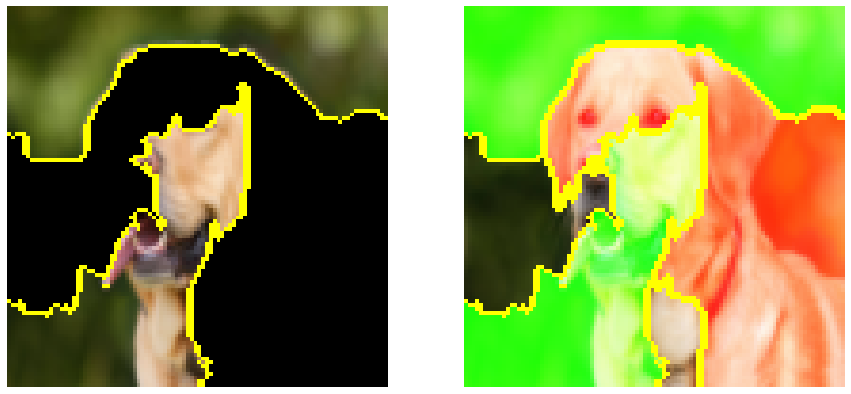

In [ ]:

from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
import skimage

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def transform_img_fn_ori(url):
    
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (299,299))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = inet_model.predict(img)
    for i in decode_predictions(preds)[0]:
        print(i)
    return img

inet_model = inc_net.InceptionV3()
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 3s 3s/step
('n02099601', 'golden_retriever', 0.69270974)
('n02099712', 'Labrador_retriever', 0.1865328)
('n04409515', 'tennis_ball', 0.005106031)
('n02104029', 'kuvasz', 0.0046458496)
('n02101556', 'clumber', 0.0020713662)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 185ms/step


(-0.5, 99.5, 99.5, -0.5)

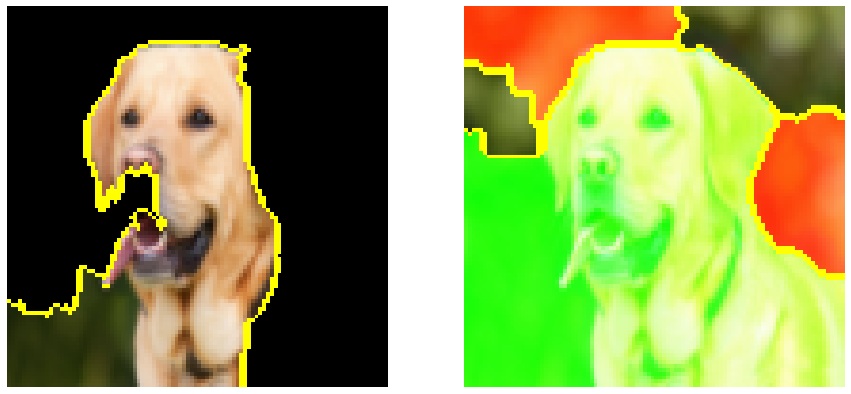

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)
 
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jovian


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
